In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ready dataset
df_ml = pd.read_csv('breast_cancer_ready_for_ml.csv')

# List of columns that might cause Data Leakage (they contain the answer)
# We search for columns related to site, recurrence time, or death info
leakage_cols = [col for col in df_ml.columns if 'Site' in col or 'Recurrence' in col or 'Death' in col or 'Survival' in col]

print(f"Removing {len(leakage_cols)} leakage-prone features...")

# Create a truly predictive feature set
X_realistic = df_ml.drop(columns=['Sample_Type'] + leakage_cols)
y = df_ml['Sample_Type']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_realistic, y, test_size=0.2, random_state=42, stratify=y)

print(f"New feature set shape: {X_train.shape}")

Removing 35 leakage-prone features...
New feature set shape: (1534, 491)


In [2]:
# Train a new model on realistic features
final_rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
final_rf.fit(X_train, y_train)

# Evaluate
y_pred = final_rf.predict(X_test)
y_prob = final_rf.predict_proba(X_test)[:, 1]

print("\n--- Realistic Model Results ---")
print(classification_report(y_test, y_pred))
print(f"Realistic ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")


--- Realistic Model Results ---
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       184
           1       0.86      0.96      0.91       200

    accuracy                           0.90       384
   macro avg       0.91      0.90      0.90       384
weighted avg       0.91      0.90      0.90       384

Realistic ROC-AUC: 0.97


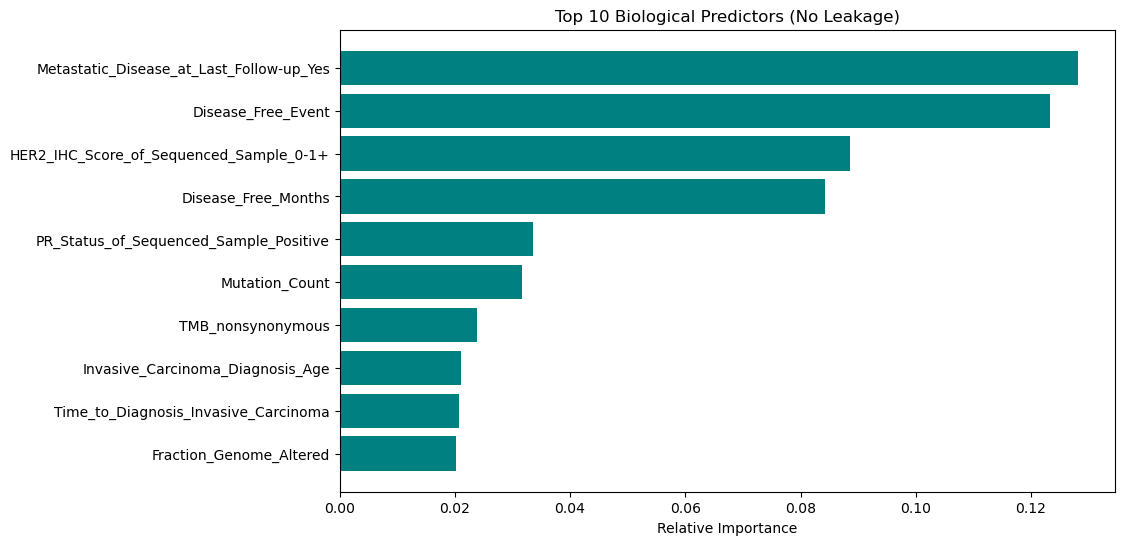

In [3]:
# Final Feature Importance
importances = final_rf.feature_importances_
top_indices = importances.argsort()[-10:] # Top 10

plt.figure(figsize=(10, 6))
plt.title('Top 10 Biological Predictors (No Leakage)')
plt.barh(range(len(top_indices)), importances[top_indices], color='teal', align='center')
plt.yticks(range(len(top_indices)), [X_realistic.columns[i] for i in top_indices])
plt.xlabel('Relative Importance')
plt.show()